In [1]:
mu = 0.6
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

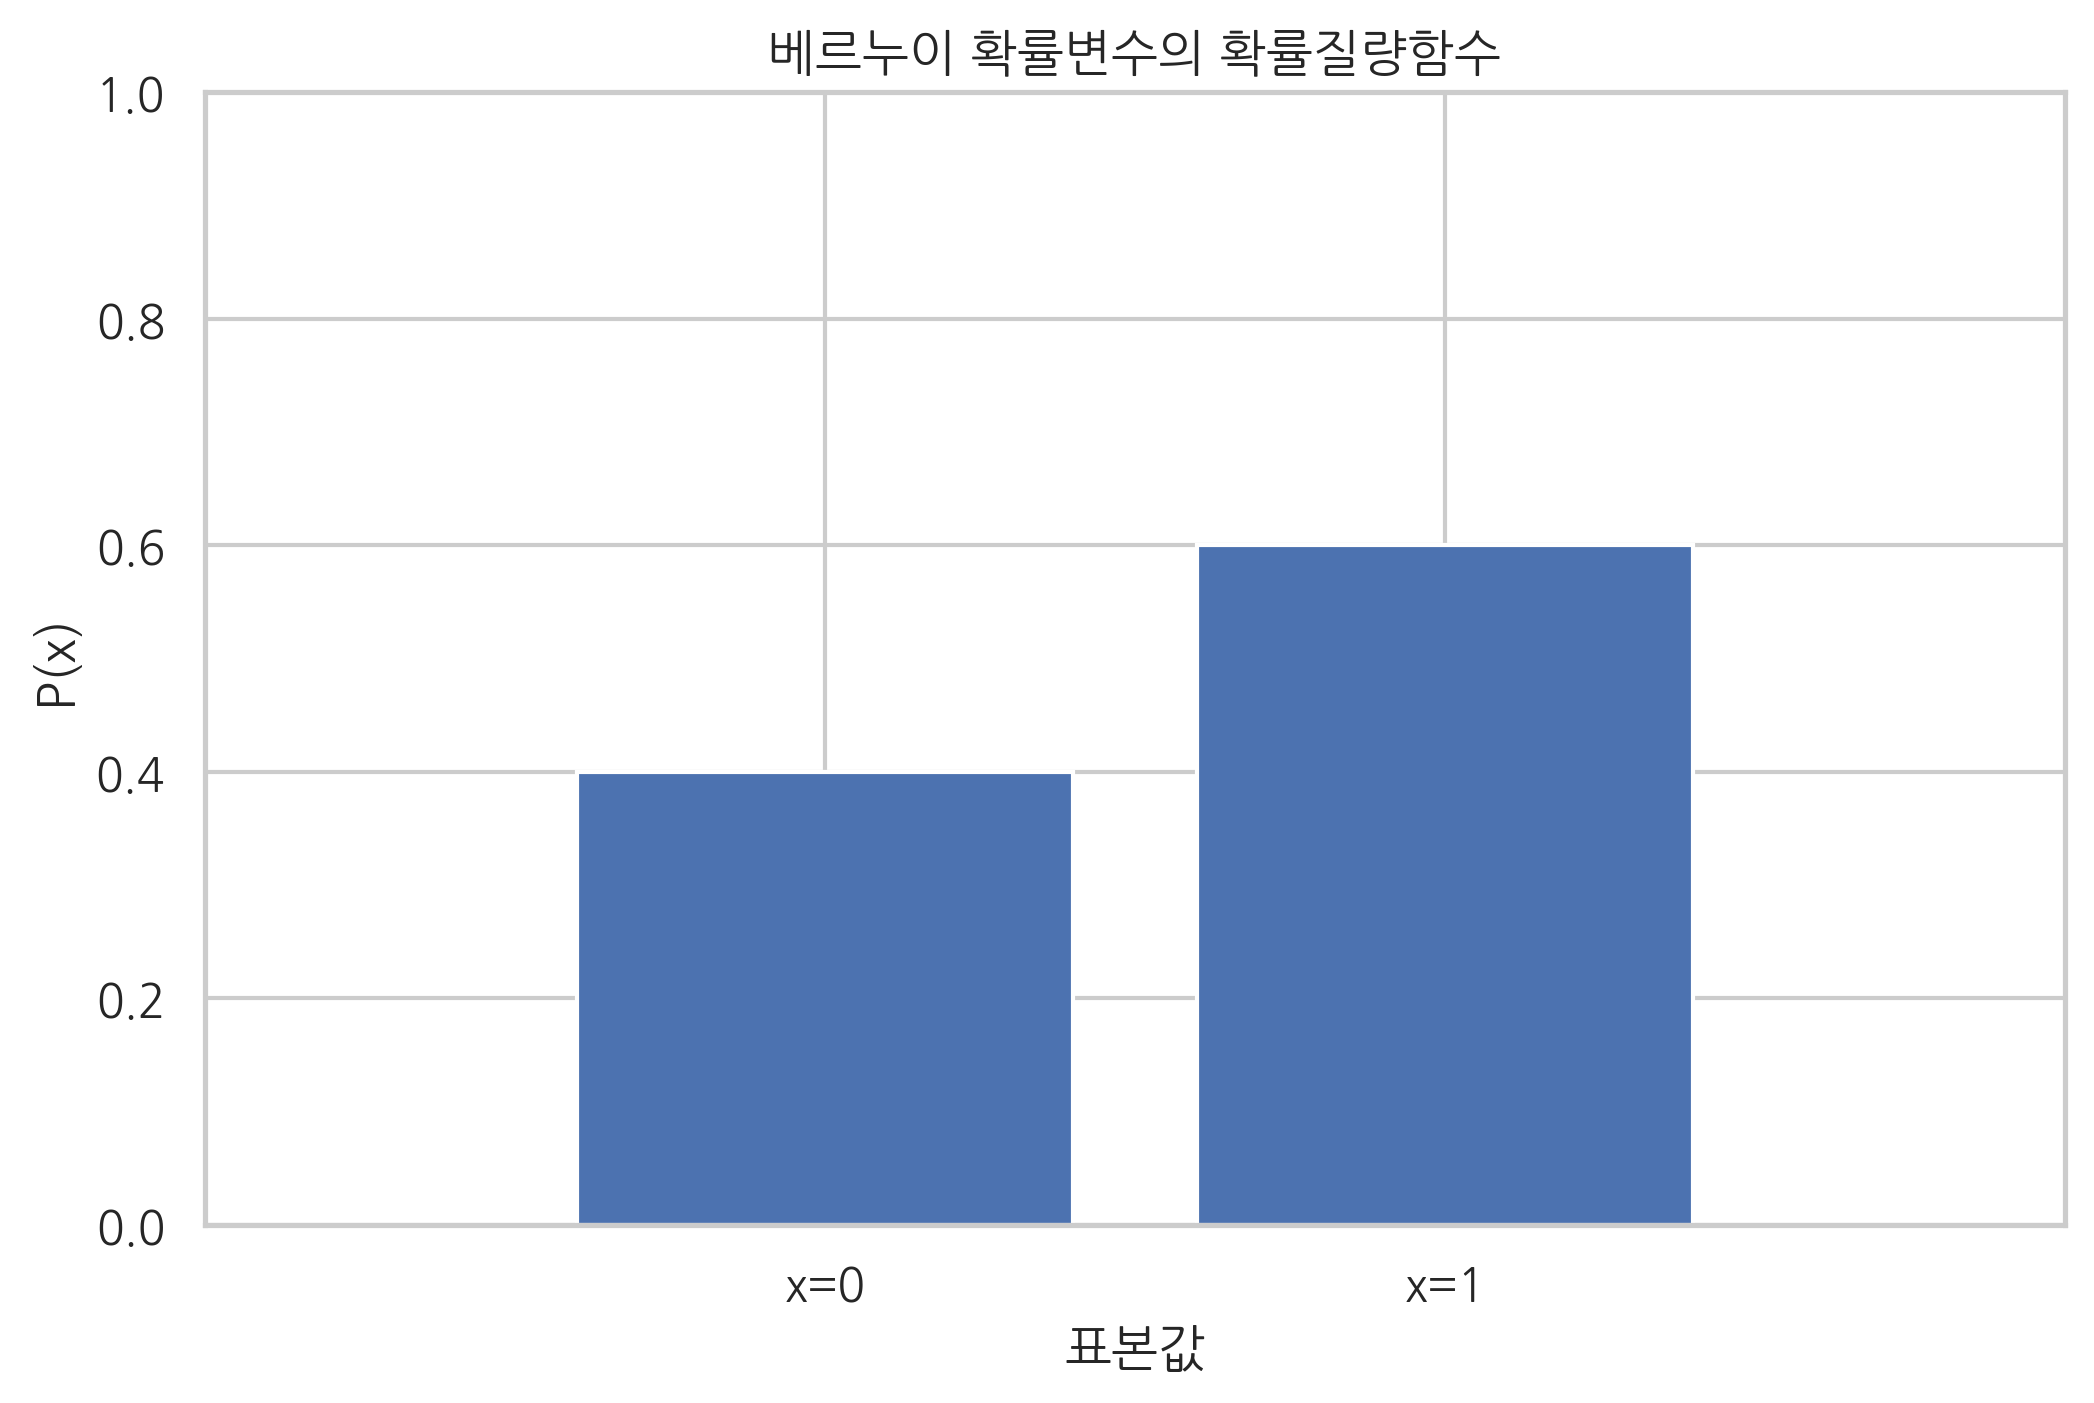

In [2]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [3]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

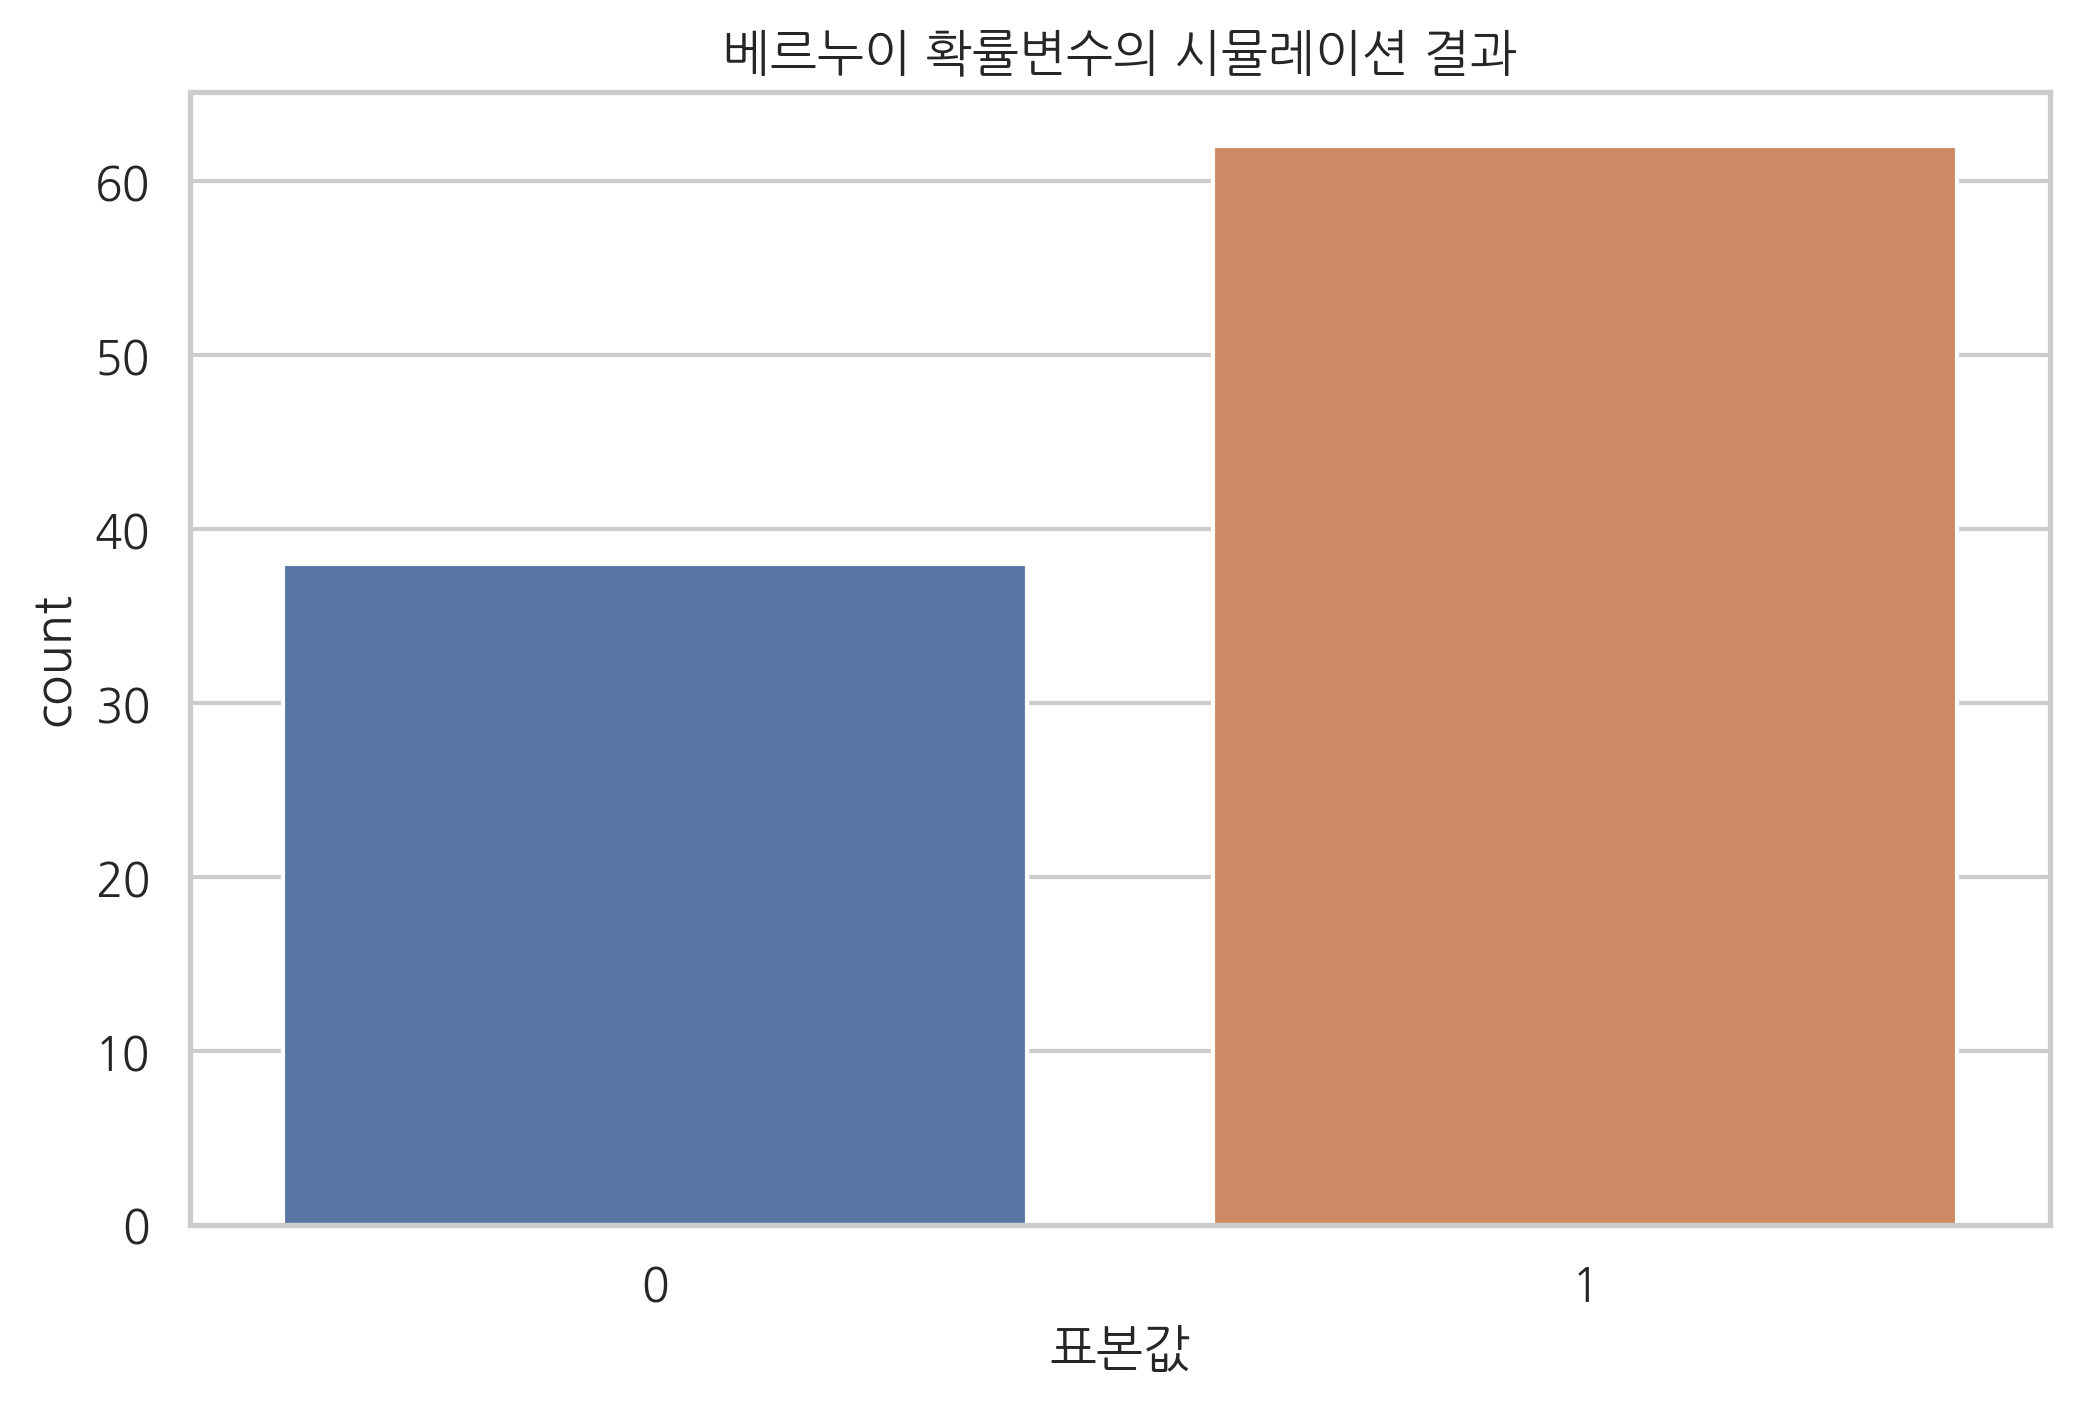

In [4]:
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [5]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [6]:
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


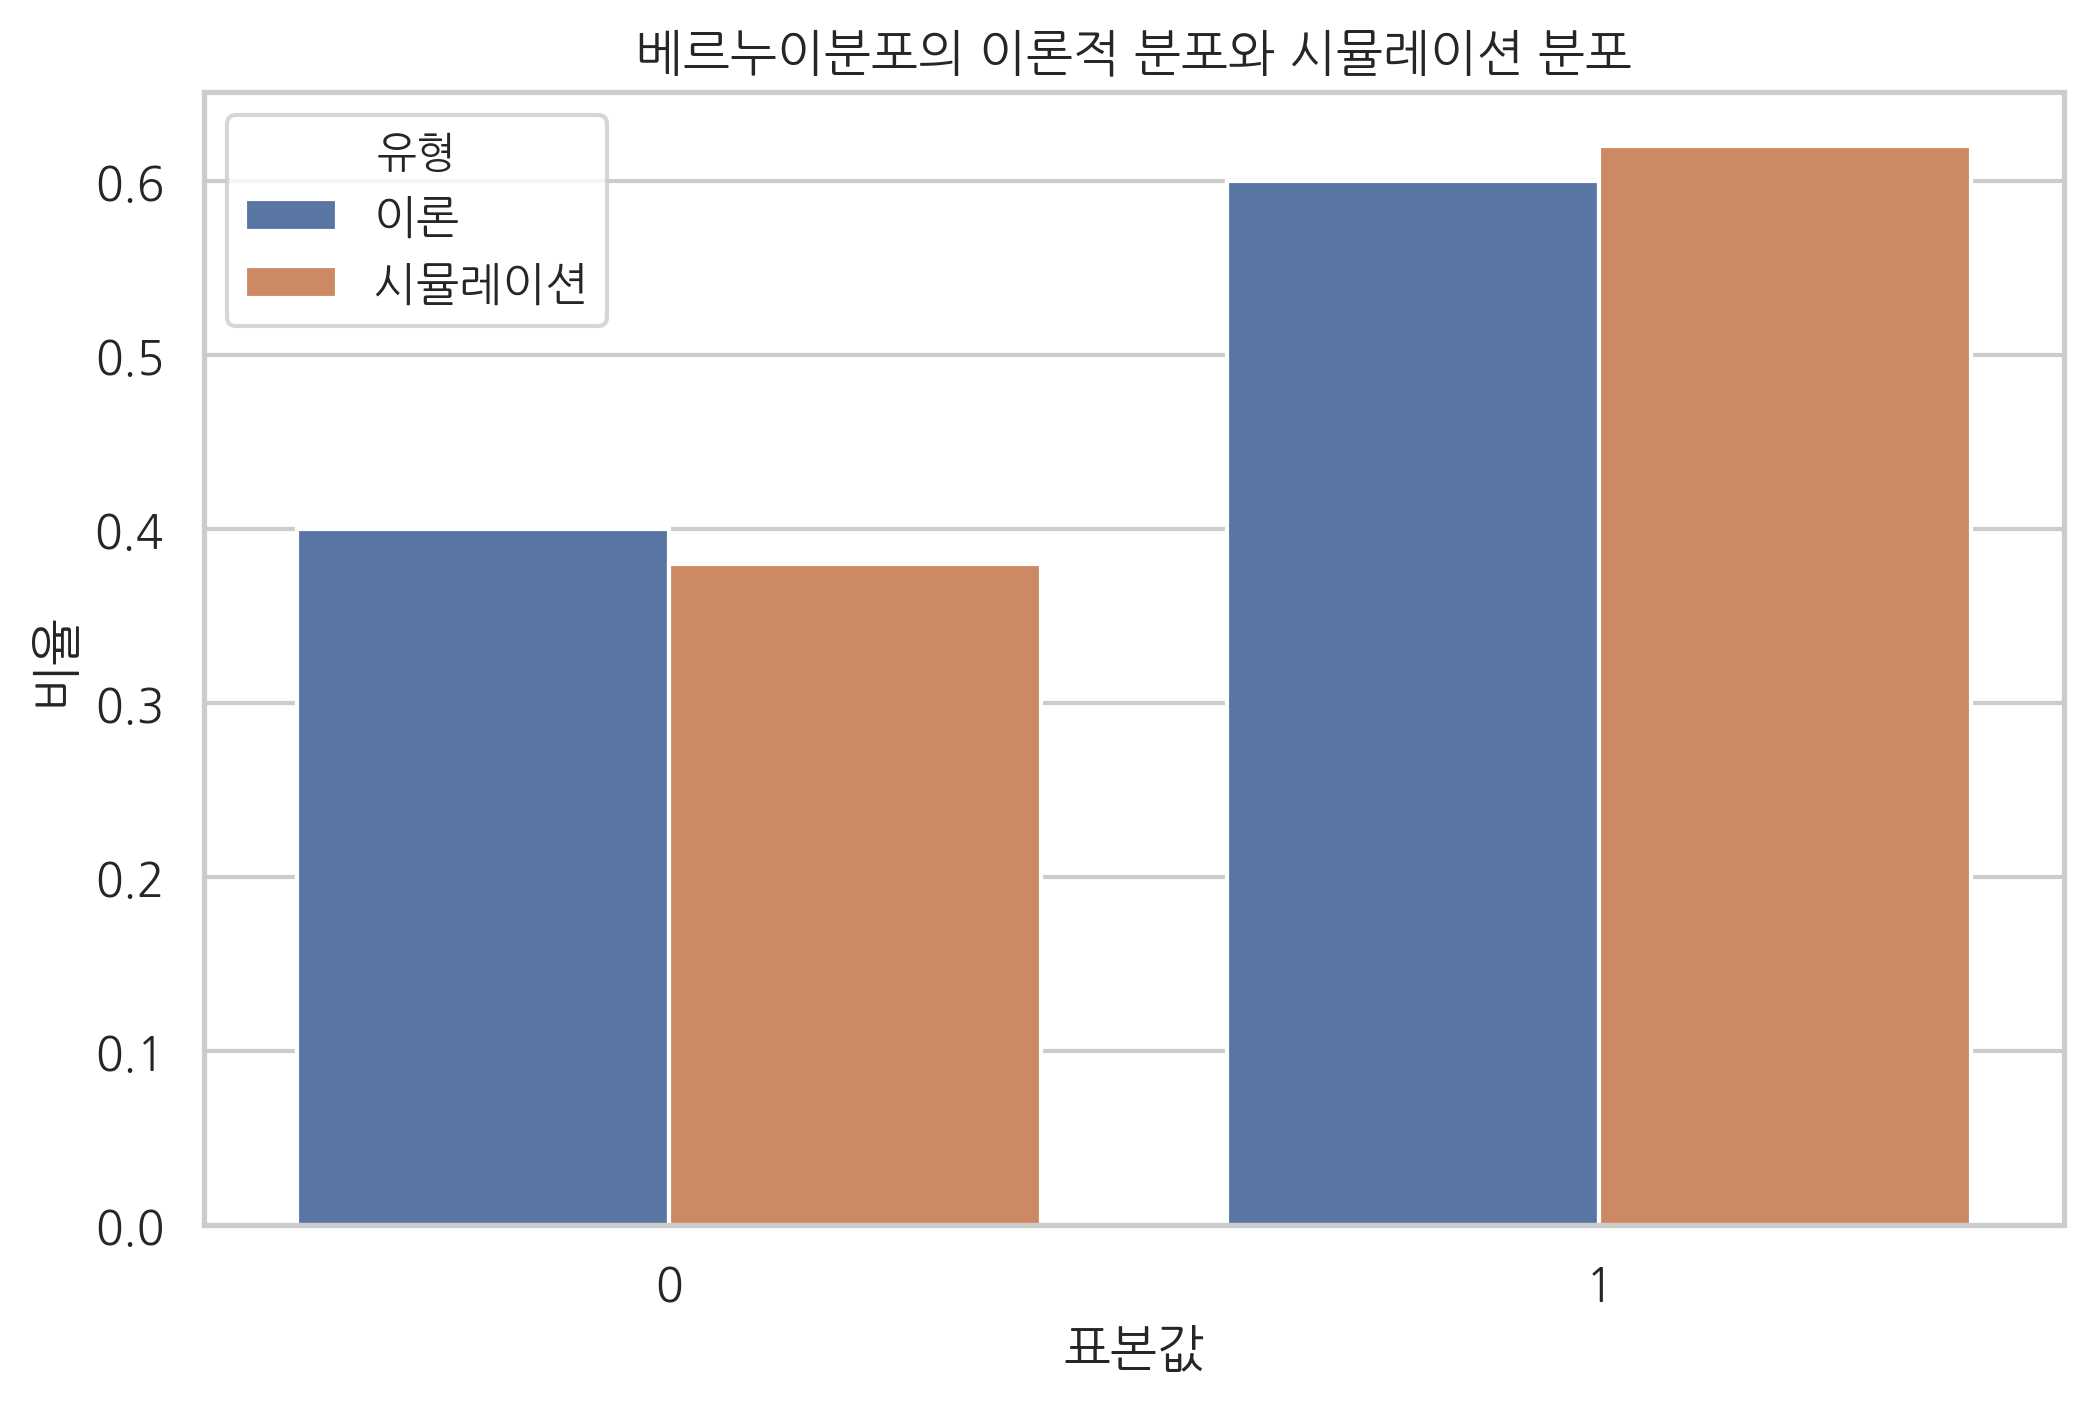

In [7]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

In [8]:
np.mean(x)

0.62

In [9]:
np.var(x, ddof=1)

0.23797979797979804

In [10]:
s = sp.stats.describe(x)
s[2], s[3]

(0.62, 0.23797979797979804)

In [11]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

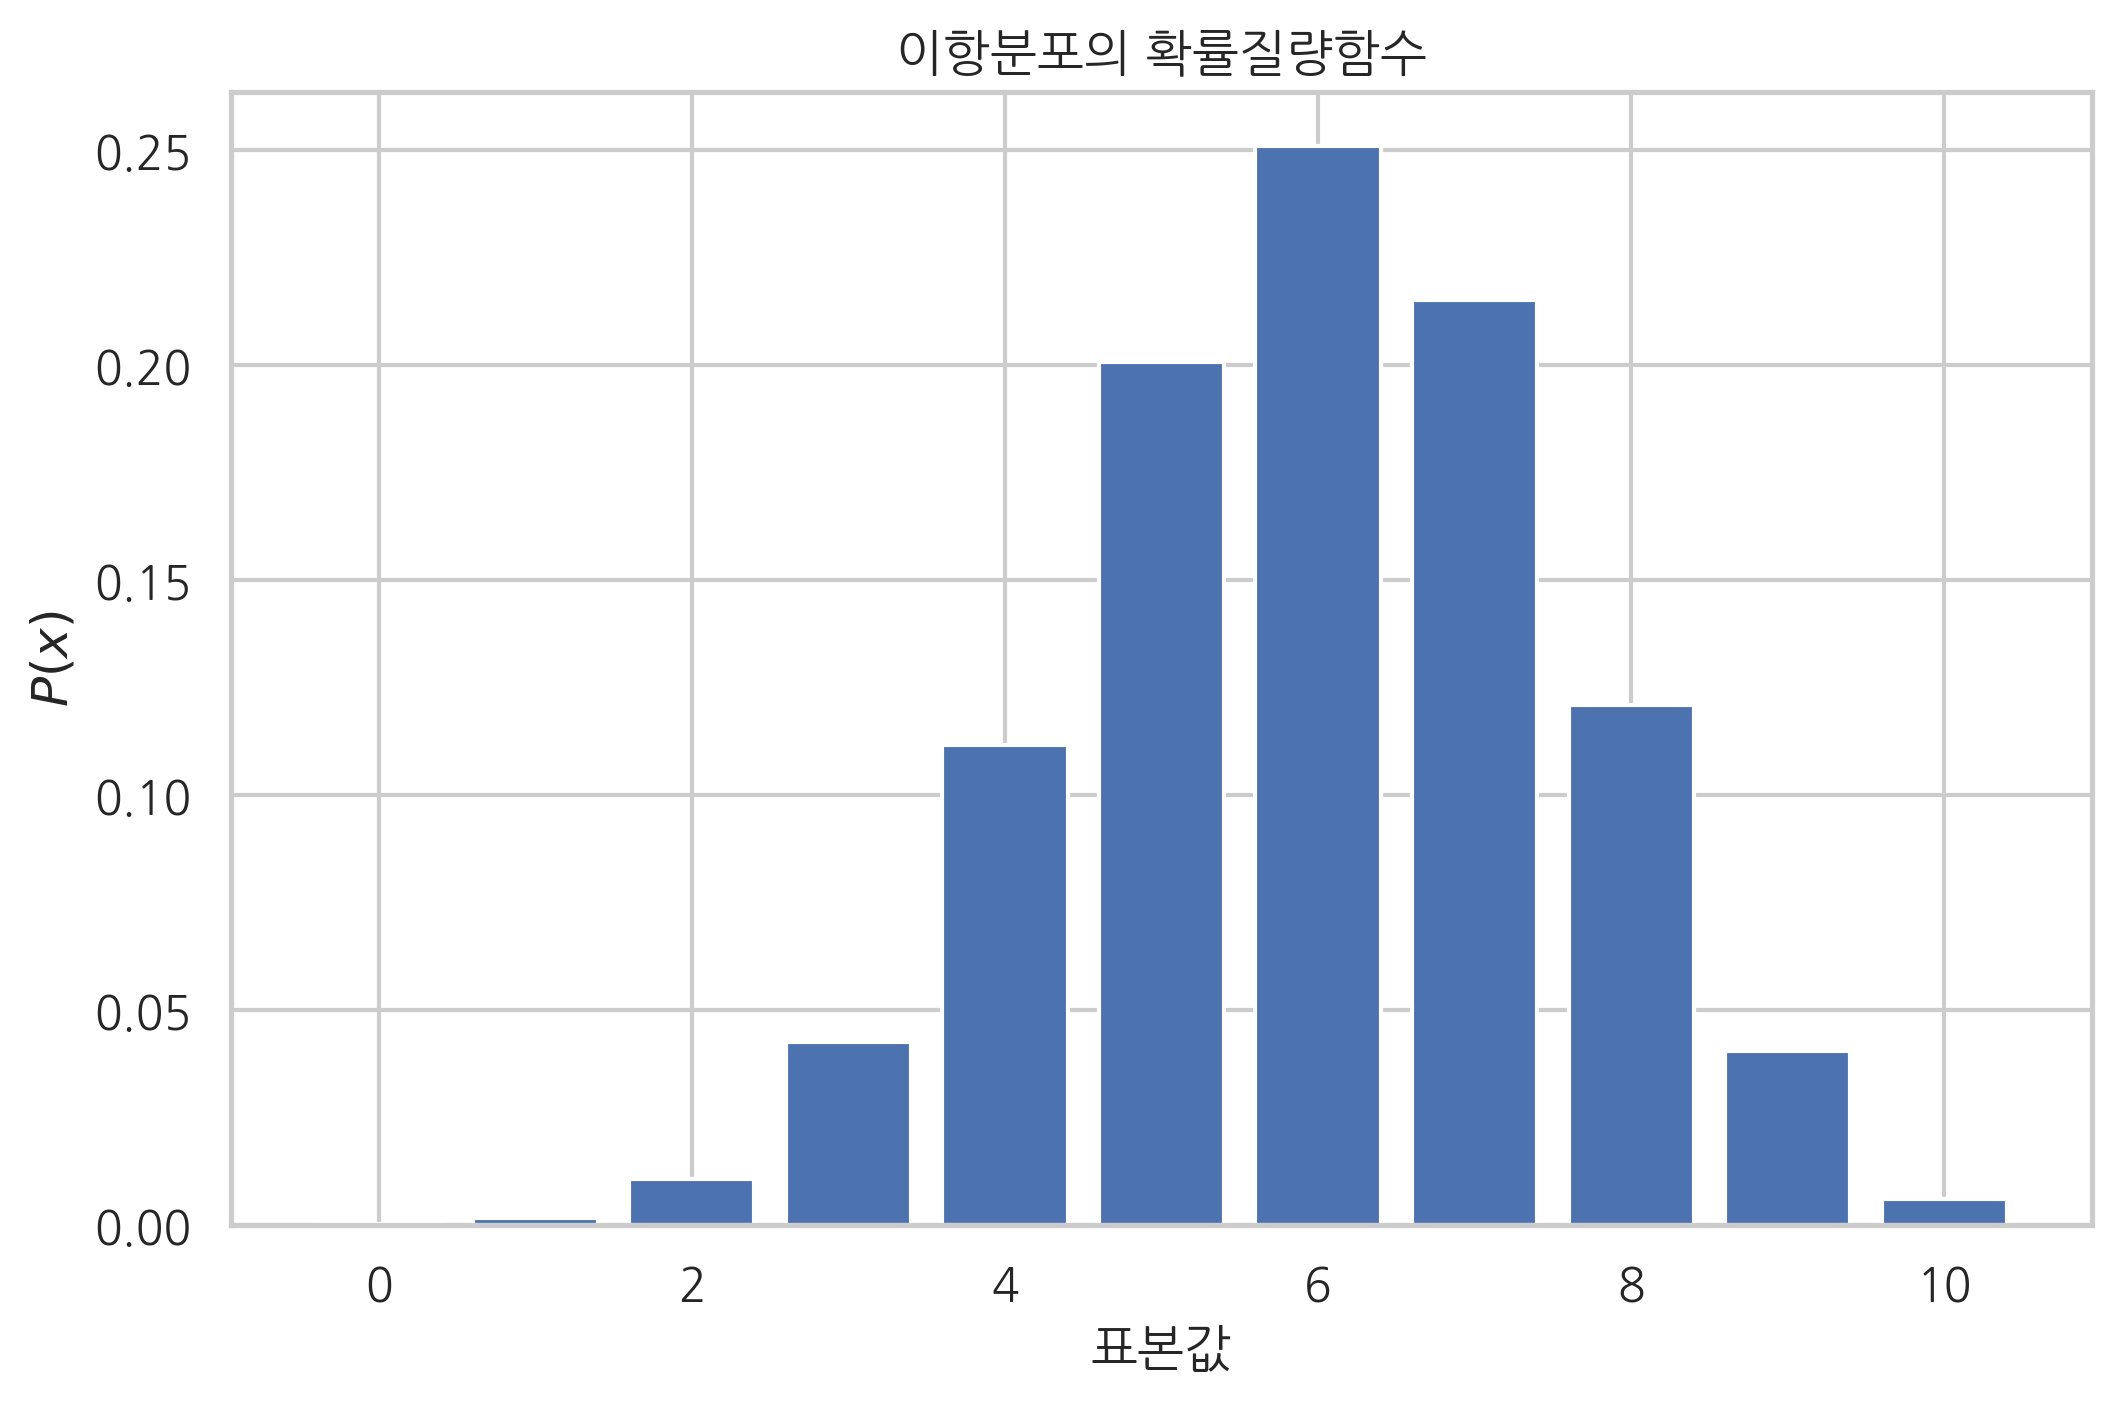

In [12]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()

In [13]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

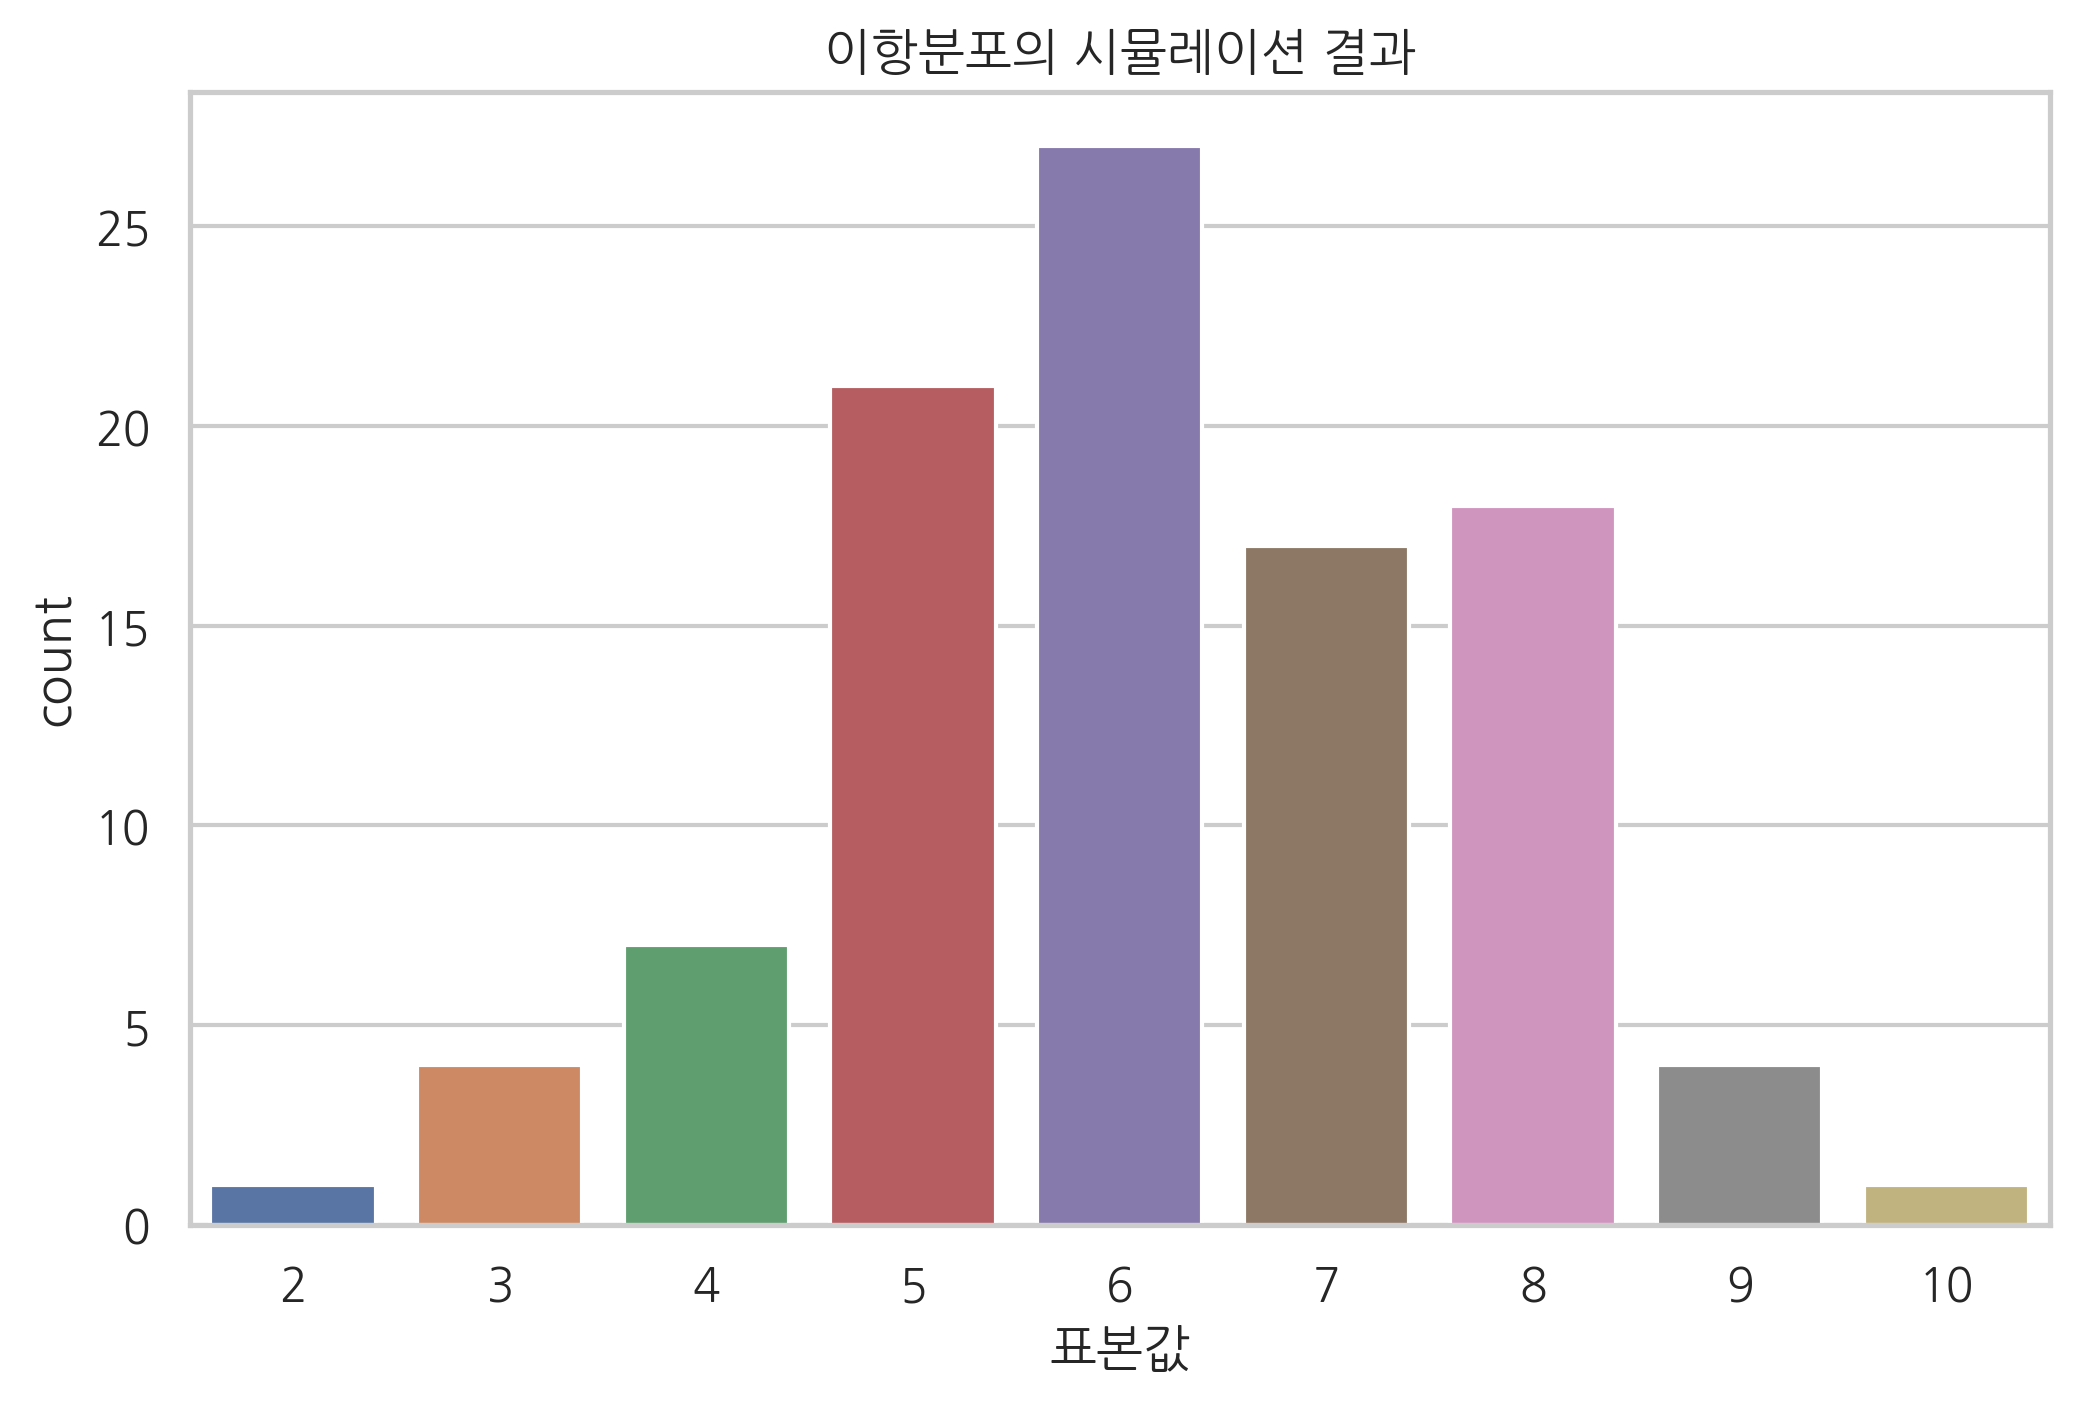

In [14]:
sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [15]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,이론,0.000105
1,0,시뮬레이션,0.000000
2,1,이론,0.001573
3,1,시뮬레이션,0.000000
4,2,이론,0.010617
5,2,시뮬레이션,0.010000
6,3,이론,0.042467
7,3,시뮬레이션,0.040000
8,4,이론,0.111477
9,4,시뮬레이션,0.070000


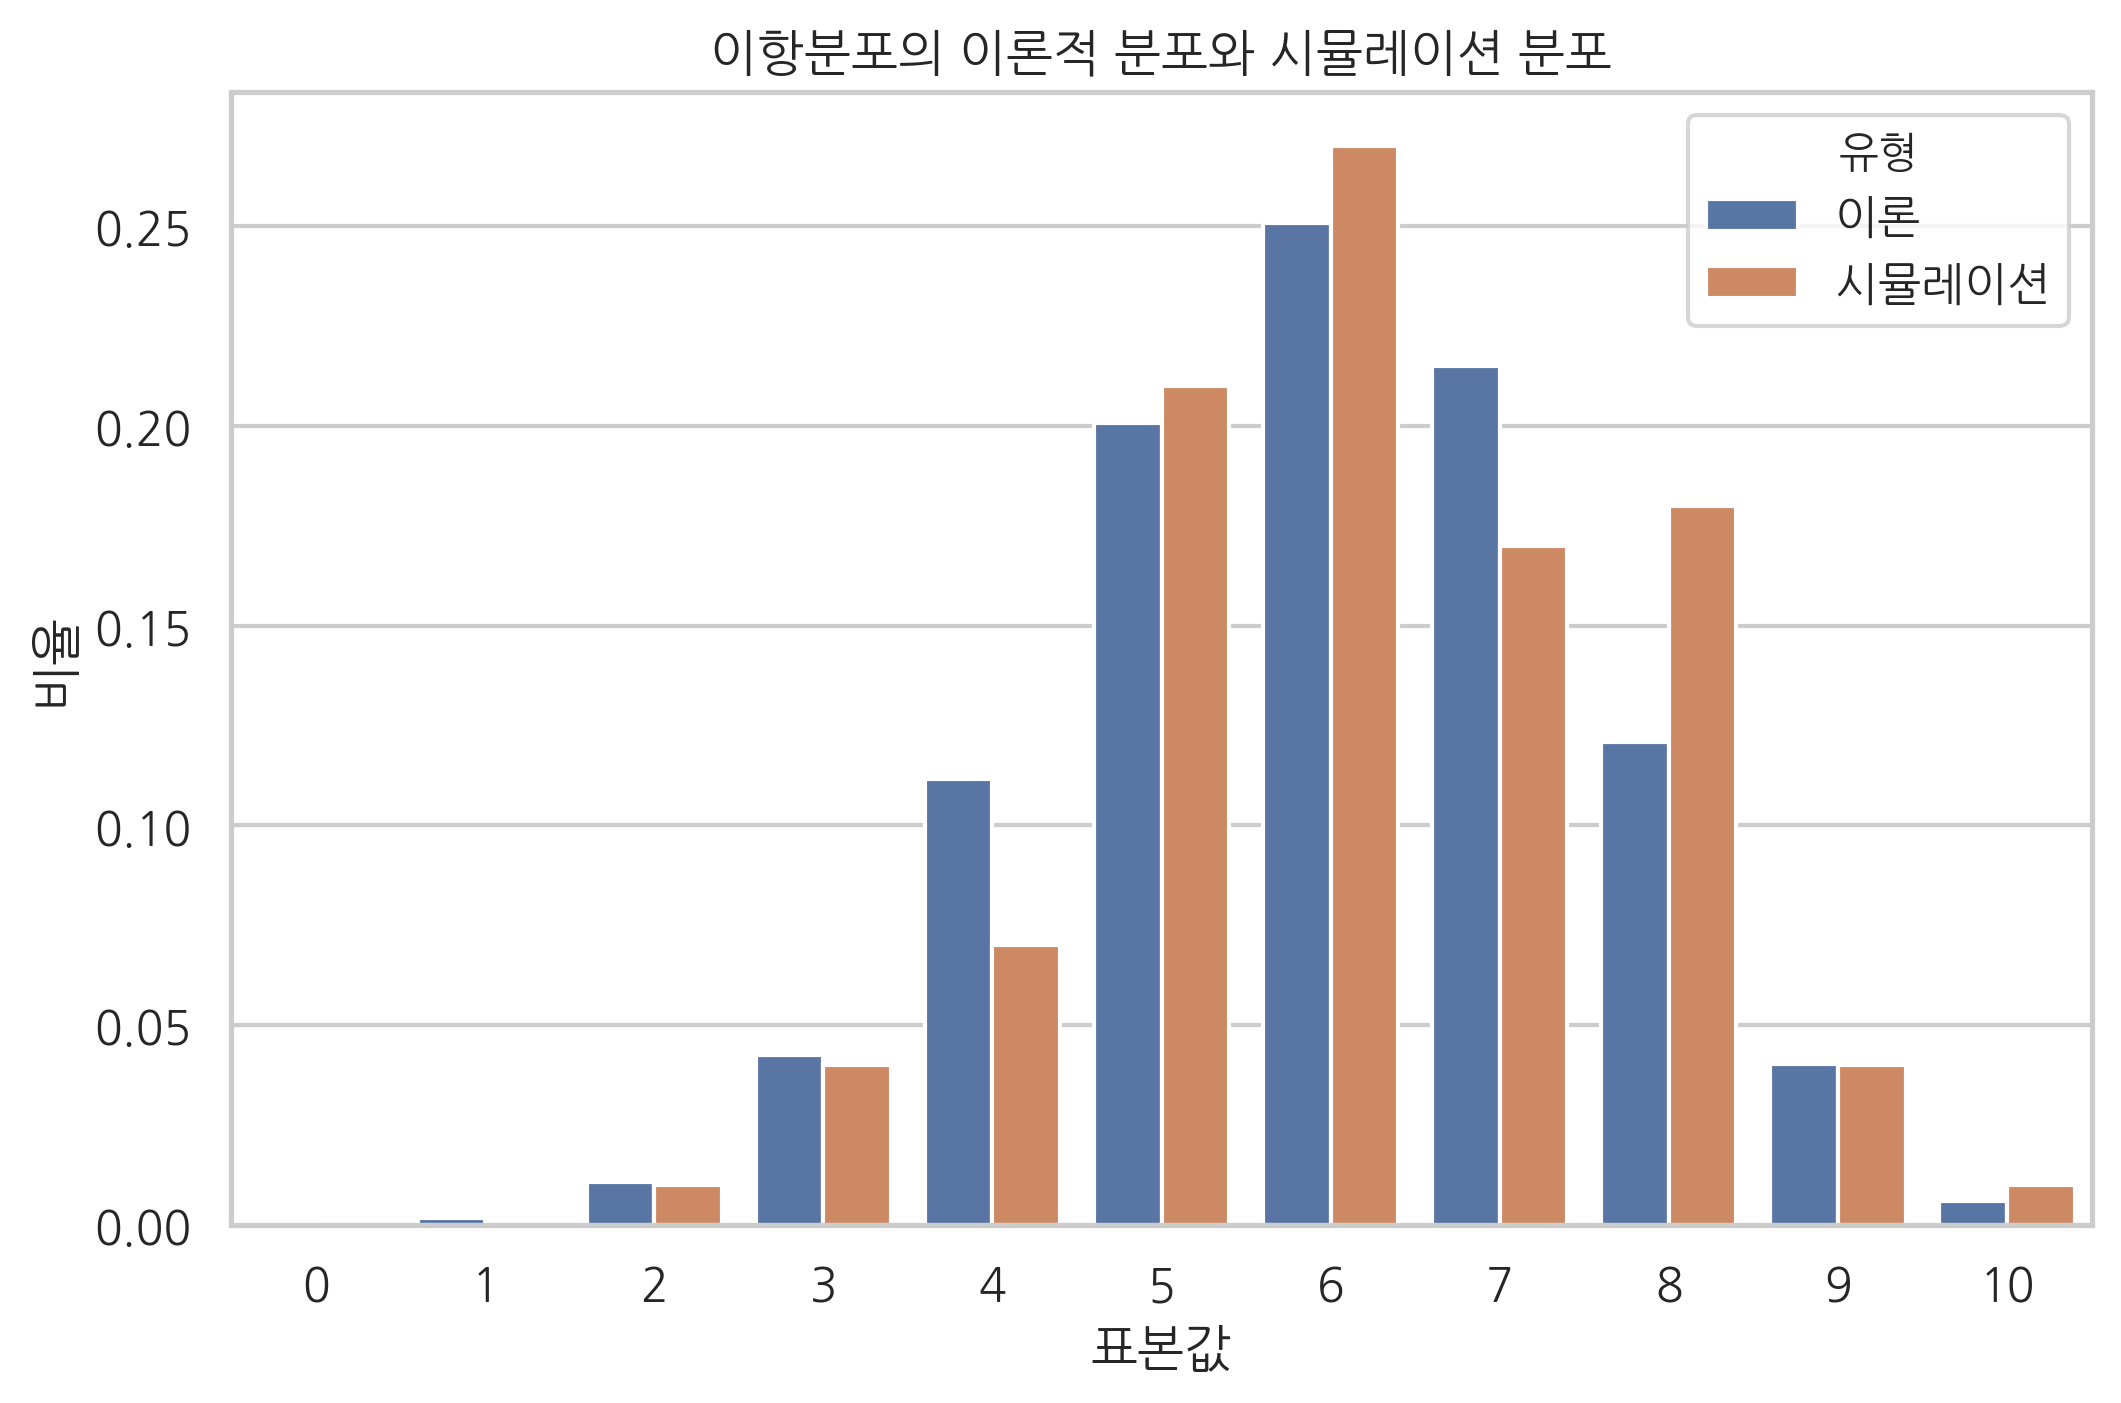

In [16]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

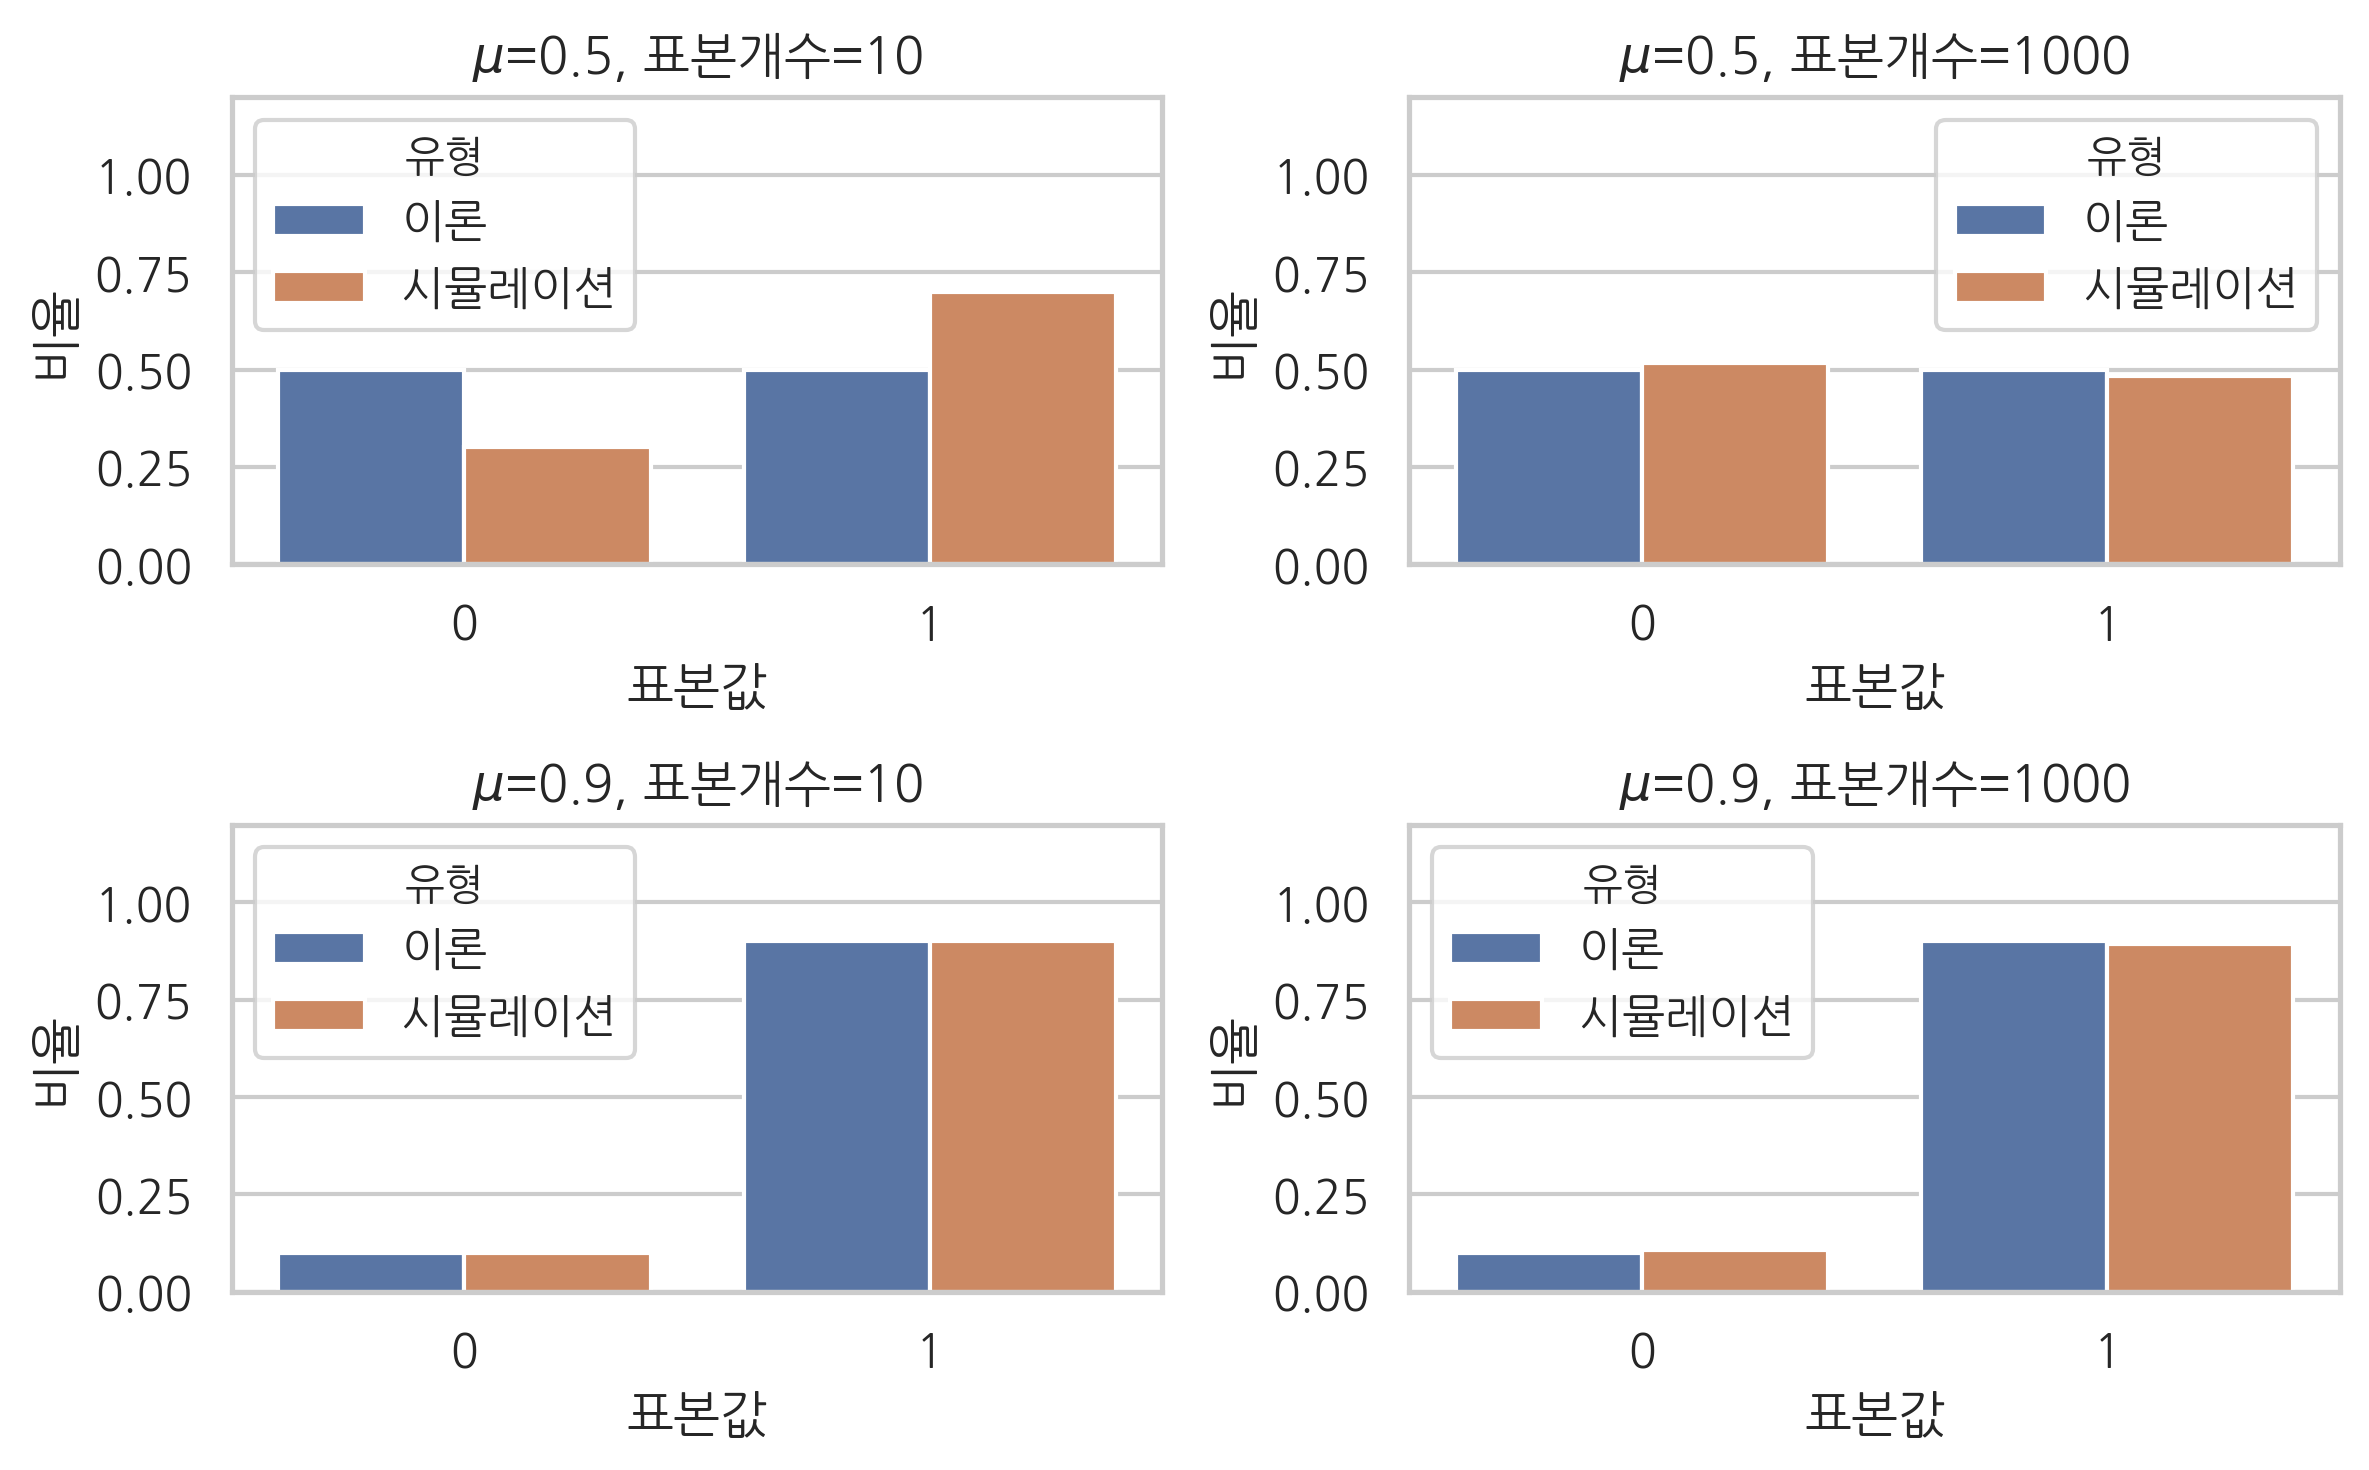

In [17]:
def plot_bernoulli(mu, M):
    rv = sp.stats.bernoulli(mu)
    x = rv.rvs(M, random_state=0)
    y = np.bincount(x, minlength=2) / float(len(x))
    xx = [0, 1]
    df = pd.DataFrame({'이론' : rv.pmf(xx), '시뮬레이션' : y})
    df.index = [0, 1]
    df2 = df.stack().reset_index()
    df2.columns = ['표본값', '유형', '비율']
    sns.barplot(x='표본값', y='비율', hue='유형', data=df2)
    plt.title('$\mu$={}, 표본개수={}'.format(mu, M))
    plt.ylim(0, 1.2)

plt.subplot(221)
plot_bernoulli(0.5, 10)
plt.subplot(222)
plot_bernoulli(0.5, 1000)
plt.subplot(223)
plot_bernoulli(0.9, 10)
plt.subplot(224)
plot_bernoulli(0.9, 1000)
plt.tight_layout()
plt.show()

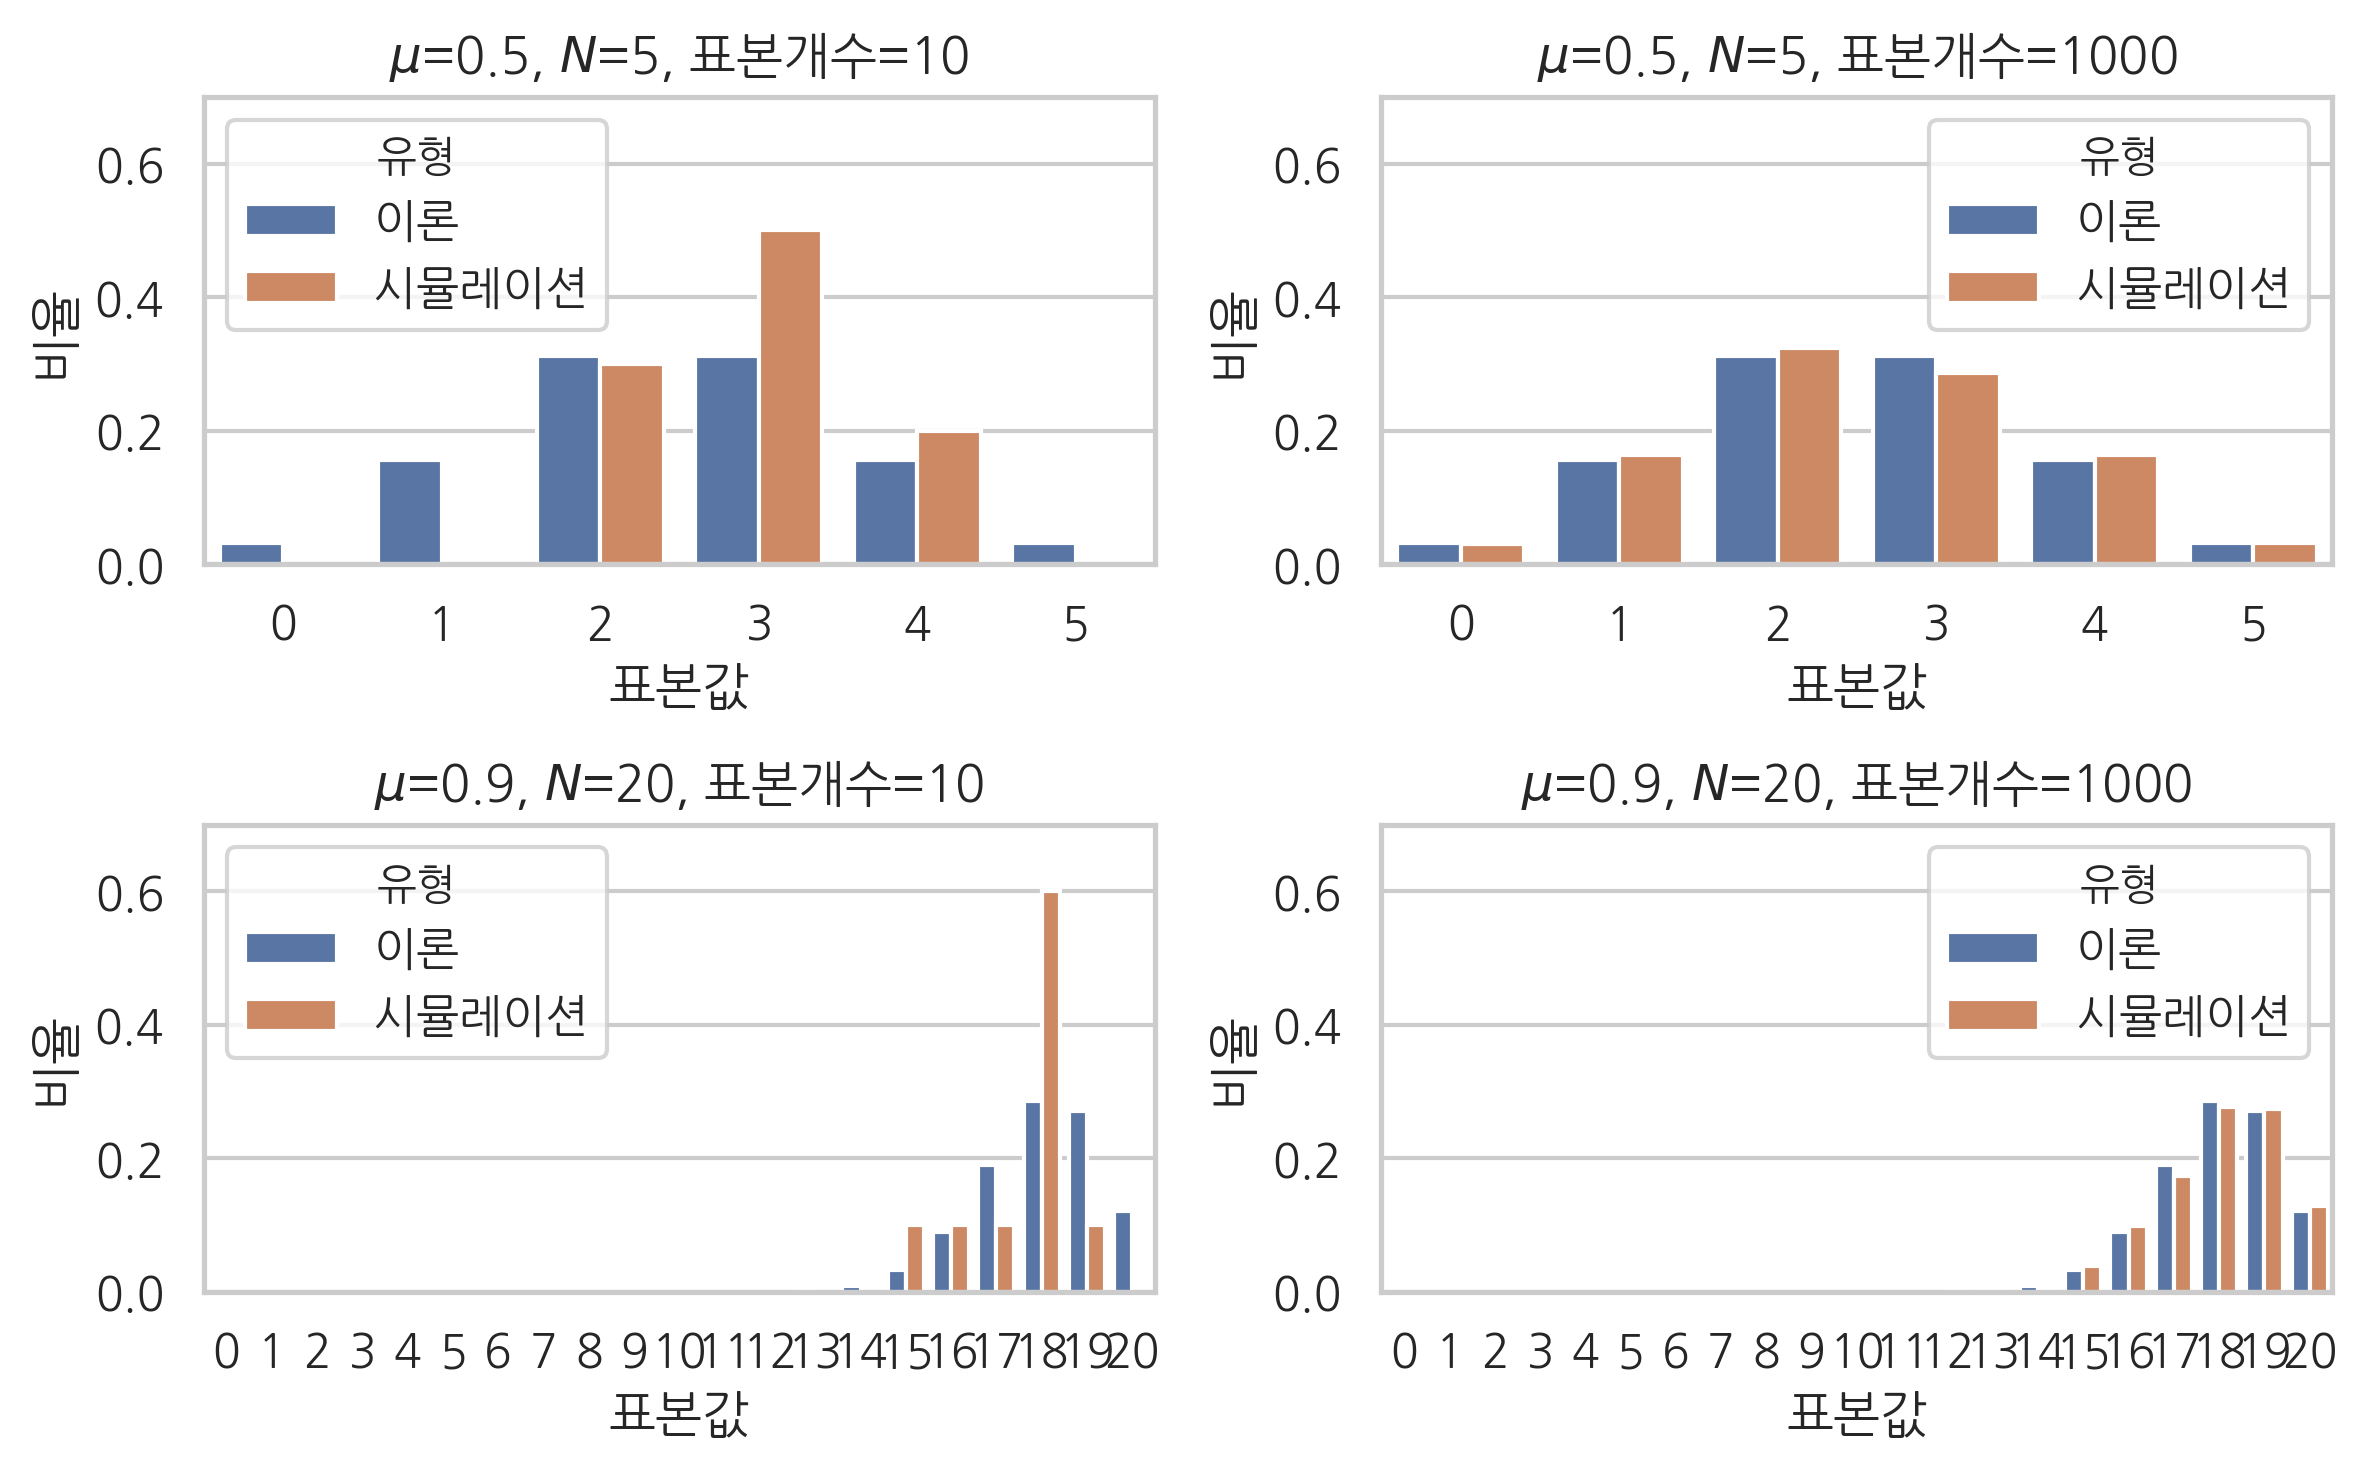

In [18]:
def plot_binom(mu, N, M):
    rv = sp.stats.binom(N, mu)
    x = rv.rvs(M, random_state=0)
    y = np.bincount(x, minlength=N+1) / float(len(x))
    xx = np.arange(N + 1)
    df = pd.DataFrame({'이론' : rv.pmf(xx), '시뮬레이션' : y})
    df = pd.DataFrame({'이론' : rv.pmf(xx), '시뮬레이션' : y}).stack()
    df = df.reset_index()
    df.columns = ['표본값', '유형', '비율']
    df.pivot("표본값", "유형", "비율")
    sns.barplot(x='표본값', y='비율', hue='유형', data=df)
    plt.title('$\mu$={}, $N$={}, 표본개수={}'.format(mu, N, M))
    plt.ylim(0, 0.7)

plt.subplot(221)
plot_binom(0.5, 5, 10)
plt.subplot(222)
plot_binom(0.5, 5, 1000)
plt.subplot(223)
plot_binom(0.9, 20, 10)
plt.subplot(224)
plot_binom(0.9, 20, 1000)
plt.tight_layout()
plt.show()